In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [2]:
df1 = pd.read_csv('analytic_data2019.csv', low_memory=False)
xcl = pd.ExcelFile('2019_County_Health_Rankings_Data_v2.xls')

In [3]:
outcomes_fact_r = pd.read_excel(xcl, sheet_name='Outcomes & Factors Rankings')

In [4]:
outcomes_fact_r.columns = list(outcomes_fact_r.iloc[0])
outcomes_fact_r.drop([0],inplace=True)

In [5]:
outcomes_fact_r.head()

,FIPS,State,County,# of Ranked Counties,Rank,Quartile,Rank,Quartile
1,01001,Alabama,Autauga,67,7,1,11,1
2,01003,Alabama,Baldwin,67,2,1,3,1
3,01005,Alabama,Barbour,67,33,2,58,4
4,01007,Alabama,Bibb,67,40,3,29,2
5,01009,Alabama,Blount,67,22,2,16,1


In [6]:
outcomes_fact_subr = pd.read_excel(xcl, sheet_name='Outcomes & Factors SubRankings')
outcomes_fact_subr.columns = list(outcomes_fact_subr.iloc[0])
outcomes_fact_subr.drop([0],inplace=True)

In [7]:
outcomes_fact_subr.head()

,FIPS,State,County,# of Ranked Counties,Rank,Quartile,Rank,Quartile,Rank,Quartile,Rank,Quartile,Rank,Quartile,Rank,Quartile
1,01001,Alabama,Autauga,67,8,1,5,1,15,1,14,1,5,1,50,3
2,01003,Alabama,Baldwin,67,3,1,4,1,3,1,4,1,3,1,62,4
3,01005,Alabama,Barbour,67,14,1,48,3,53,4,30,2,61,4,32,2
4,01007,Alabama,Bibb,67,47,3,24,2,38,3,16,1,38,3,31,2
5,01009,Alabama,Blount,67,36,3,14,1,10,1,41,3,15,1,53,4


In [8]:
ranked_measure = pd.read_excel(xcl, sheet_name='Ranked Measure Data')
ranked_measure.columns = list(ranked_measure.iloc[0])
ranked_measure.drop([0],inplace=True)

In [9]:
ranked_measure.head()

,FIPS,State,County,Years of Potential Life Lost Rate,95% CI - Low,95% CI - High,Quartile,YPLL Rate (Black),YPLL Rate (Hispanic),YPLL Rate (White),...,95% CI - High,Quartile,% Drive Alone (Black),% Drive Alone (Hispanic),% Drive Alone (White),# Workers who Drive Alone,% Long Commute - Drives Alone,95% CI - Low,95% CI - High,Quartile
1,01001,Alabama,Autauga,8824.06,7935.33,9712.79,1,10471.3,NaN,8706.66,...,88.9008,3,82.722,NaN,83.71,20911,38.3,34.3627,42.2373,3
2,01003,Alabama,Baldwin,7224.63,6794.13,7655.14,1,10042.5,3086.61,7277.78,...,86.5707,2,84.9219,68.3439,83.7991,74415,40.5,38.1835,42.8165,3
3,01005,Alabama,Barbour,9586.17,8200.12,10972.2,1,11332.6,NaN,7309.64,...,85.7693,1,80.1547,NaN,86.2453,7242,33.8,28.8672,38.7328,2
4,01007,Alabama,Bibb,11783.5,10160,13407.1,3,14812.5,NaN,11327.6,...,90.6773,3,NaN,NaN,NaN,6930,48.6,40.3108,56.8892,4
5,01009,Alabama,Blount,10908.1,9895.58,11920.6,3,NaN,5619.65,11336,...,88.8468,3,NaN,81.7672,83.4145,18426,59.7,55.4807,63.9193,4


In [10]:
add_measure = pd.read_excel(xcl, sheet_name='Additional Measure Data')
add_measure.columns = list(add_measure.iloc[0])
add_measure.drop([0],inplace=True)

In [11]:
add_measure.head()

,FIPS,State,County,Life Expectancy,95% CI - Low,95% CI - High,Life Expectancy (Black),Life Expectancy (Hispanic),Life Expectancy (White),# Deaths,...,% Hispanic,# Non-Hispanic White,% Non-Hispanic White,# Not Proficient in English,% Not Proficient in English,95% CI - Low,95% CI - High,% Female,# Rural,% Rural
1,01001,Alabama,Autauga,76.3306,75.5541,77.1071,74.6006,NaN,76.3372,815,...,2.85745,41336,74.4739,430,0.828548,0.422472,1.23462,51.3422,22921,42.0022
2,01003,Alabama,Baldwin,78.5995,78.2084,78.9906,75.6289,98.0399,78.537,2827,...,4.5502,176582,83.0474,872,0.454512,0.282144,0.62688,51.4528,77060,42.2791
3,01005,Alabama,Barbour,75.7795,74.6394,76.9196,74.2402,NaN,77.5684,451,...,4.20657,11613,45.9557,297,1.19927,0.580536,1.81801,47.2299,18613,67.7896
4,01007,Alabama,Bibb,73.9283,72.6246,75.2319,72.2947,NaN,74.1095,445,...,2.63808,16842,74.2986,84,0.394348,0,0.933361,46.4531,15663,68.3526
5,01009,Alabama,Blount,74.5978,73.811,75.3845,NaN,78.5771,74.0982,1050,...,9.5651,50439,86.9443,1013,1.87,1.36418,2.37583,50.6886,51562,89.9515


In [12]:
add_measure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3142 entries, 1 to 3142
Columns: 111 entries, FIPS to % Rural
dtypes: object(111)
memory usage: 2.7+ MB


In [13]:
df1.drop([0],inplace=True)
df1.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,...,Male population 18-44 raw value,Male population 45-64 raw value,Male population 65+ raw value,Total male population raw value,Female population 0-17 raw value,Female population 18-44 raw value,Female population 45-64 raw value,Female population 65+ raw value,Total female population raw value,Population growth raw value
1,00,000,00000,US,United States,2019,NaN,6900.630354,3745538,908266078,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01,000,01000,AL,Alabama,2019,NaN,9917.2328984,80440,13636816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01,001,01001,AL,Autauga County,2019,1,8824.0571232,815,156132,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01,003,01003,AL,Baldwin County,2019,1,7224.6321603,2827,576496,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,01,005,01005,AL,Barbour County,2019,1,9586.165037,451,72222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3194 entries, 1 to 3194
Columns: 534 entries, State FIPS Code to Population growth raw value
dtypes: object(534)
memory usage: 13.0+ MB


In [15]:
life_exp = add_measure[['FIPS','State','County','Life Expectancy', '% Frequent Physical Distress',
                       '% Frequent Mental Distress', '% Diabetic', '% Food Insecure',
                        '% Insufficient Sleep', 'Household Income', '% Homeowners',
                       '% Severe Housing Cost Burden']]
life_exp.head()

,FIPS,State,County,Life Expectancy,% Frequent Physical Distress,% Frequent Mental Distress,% Diabetic,% Food Insecure,% Insufficient Sleep,Household Income,% Homeowners,% Severe Housing Cost Burden
1,01001,Alabama,Autauga,76.3306,12.8244,12.6384,14.2,13.4,35.9054,58343,73.2877,12.6452
2,01003,Alabama,Baldwin,78.5995,12.622,12.8226,11.3,12.3,33.3059,56607,72.8593,12.7959
3,01005,Alabama,Barbour,75.7795,16.2162,14.6323,18,23.2,38.5632,32490,62.5068,13.5868
4,01007,Alabama,Bibb,73.9283,13.163,12.854,14.9,15.8,38.1489,45795,75.3615,8.73389
5,01009,Alabama,Blount,74.5978,13.7201,13.8279,14.3,11,35.945,48253,78.521,8.1945


In [16]:
factors = ranked_measure[['FIPS',
                         '% Fair/Poor',
                         '% LBW', '% Smokers', '% Obese', 'Food Environment Index',
                         '% Physically Inactive', '% With Access', '% Excessive Drinking',
                         '% Alcohol-Impaired','Chlamydia Rate', 'Teen Birth Rate', '% Uninsured',
                          'Dentist Rate', 'MHP Rate',
                         'MHP Ratio', 'Preventable Hosp. Rate', '% Screened', '% Vaccinated',
                         'Graduation Rate', '% Some College', '% Unemployed', '% Children in Poverty',
                          'Income Ratio', '% Single-Parent Households', 'Association Rate',
                          'Injury Death Rate', 'Average Daily PM2.5',
                         'Presence of violation', '% Severe Housing Problems','% Drive Alone',
                         '% Long Commute - Drives Alone']]

In [17]:
print('Factors shape:', factors.shape)
print('Life Expectancy shape:', life_exp.shape)

Factors shape: (3142, 32)
Life Expectancy shape: (3142, 12)


In [18]:
df_merged = life_exp.merge(factors, how='left',on='FIPS')

In [19]:
df_merged.dropna(subset=['Life Expectancy'], inplace=True)
df_merged.drop(['MHP Rate', 'MHP Ratio'],axis=1, inplace=True)

In [20]:
df_final = df_merged.dropna()
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2734 entries, 0 to 3141
Data columns (total 41 columns):
FIPS                             2734 non-null object
State                            2734 non-null object
County                           2734 non-null object
Life Expectancy                  2734 non-null object
% Frequent Physical Distress     2734 non-null object
% Frequent Mental Distress       2734 non-null object
% Diabetic                       2734 non-null object
% Food Insecure                  2734 non-null object
% Insufficient Sleep             2734 non-null object
Household Income                 2734 non-null object
% Homeowners                     2734 non-null object
% Severe Housing Cost Burden     2734 non-null object
% Fair/Poor                      2734 non-null object
% LBW                            2734 non-null object
% Smokers                        2734 non-null object
% Obese                          2734 non-null object
Food Environment Index       

Our aim to create a model to predict Life Expectancy by counties in the United States. 
Target value = Life Expectancy.

It is a Regression Task that we will be using independent variables from our data as predictors. We will follow feature and model selection process to reach a final model which will predict Life Expectancy most accuratly.

In [21]:
#Getting data with numerical columns 
num_col = []
for i in df_final.columns:
    if (type(df_final[i][0]) != str):
        num_col.append(i)
num_col

['Life Expectancy',
 '% Frequent Physical Distress',
 '% Frequent Mental Distress',
 '% Diabetic',
 '% Food Insecure',
 '% Insufficient Sleep',
 'Household Income',
 '% Homeowners',
 '% Severe Housing Cost Burden',
 '% Fair/Poor',
 '% LBW',
 '% Smokers',
 '% Obese',
 'Food Environment Index',
 '% Physically Inactive',
 '% With Access',
 '% Excessive Drinking',
 '% Alcohol-Impaired',
 'Chlamydia Rate',
 'Teen Birth Rate',
 '% Uninsured',
 'Dentist Rate',
 'Preventable Hosp. Rate',
 '% Screened',
 '% Vaccinated',
 'Graduation Rate',
 '% Some College',
 '% Unemployed',
 '% Children in Poverty',
 'Income Ratio',
 '% Single-Parent Households',
 'Association Rate',
 'Injury Death Rate',
 'Average Daily PM2.5',
 '% Severe Housing Problems',
 '% Drive Alone',
 '% Long Commute - Drives Alone']

In [22]:
num = df_final[num_col].astype('float64')
num.head()

,Life Expectancy,% Frequent Physical Distress,% Frequent Mental Distress,% Diabetic,% Food Insecure,% Insufficient Sleep,Household Income,% Homeowners,% Severe Housing Cost Burden,% Fair/Poor,...,% Unemployed,% Children in Poverty,Income Ratio,% Single-Parent Households,Association Rate,Injury Death Rate,Average Daily PM2.5,% Severe Housing Problems,% Drive Alone,% Long Commute - Drives Alone
0,76.330589,12.824434,12.638357,14.2,13.4,35.905406,58343.0,73.287736,12.645206,18.411124,...,3.863522,19.3,4.636664,24.700097,12.631731,74.031808,11.7,14.954646,85.965057,38.3
1,78.599498,12.622002,12.822558,11.3,12.3,33.305868,56607.0,72.859338,12.795922,18.060458,...,3.988336,14.7,4.518560,25.184091,10.692213,69.374289,10.3,13.831725,84.719423,40.5
2,75.779457,16.216160,14.632311,18.0,23.2,38.563167,32490.0,62.506800,13.586765,25.773416,...,5.900923,50.3,5.755063,57.215743,8.472944,72.900134,11.5,15.455531,83.404353,33.8
3,73.928271,13.162968,12.854036,14.9,15.8,38.148865,45795.0,75.361481,8.733889,19.996912,...,4.385140,27.3,4.254594,29.565404,10.157665,100.077937,11.2,10.960854,86.365902,48.6
4,74.597767,13.720057,13.827943,14.3,11.0,35.945010,48253.0,78.521025,8.194495,21.095323,...,4.021393,18.5,4.126883,29.569733,9.011507,105.197227,11.7,10.401153,86.792275,59.7


In [23]:
#Checking for duplicates
num.duplicated().sum()

0

At this point we will create a test set and put it aside to prevent any possible generalization error
and data snooping bias in our models

For this purpose we will use sklearn train_test_split function which allow us to plit our data into multiple
datasets

In [24]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(num, test_size=0.4, random_state=42)

In [25]:
train_set.reset_index(drop=True,inplace=True)

In [26]:
#Removing outliers
train_set = train_set[(np.abs(stats.zscore(train_set)) < 1.8).all(axis=1)]

In [27]:
train_set.corrwith(train_set['Life Expectancy']).abs().sort_values(ascending=False).head(10)

Life Expectancy                 1.000000
Teen Birth Rate                 0.699542
% Fair/Poor                     0.672965
% Physically Inactive           0.640525
% Smokers                       0.637191
% Frequent Physical Distress    0.630013
% Frequent Mental Distress      0.629876
% Diabetic                      0.617454
% Children in Poverty           0.597622
Household Income                0.595019
dtype: float64

In [89]:
#Let's get top 7 attributes with the highest correlation to Life Expectancy and plot a heatmap  
df_seven = train_set[['Life Expectancy', '% Smokers', '% Physically Inactive', 
               '% Frequent Physical Distress', 'Teen Birth Rate', '% Diabetic',
                     '% Frequent Mental Distress', '% Fair/Poor']]

In [90]:
df_seven.corr()

,Life Expectancy,% Smokers,% Physically Inactive,% Frequent Physical Distress,Teen Birth Rate,% Diabetic,% Frequent Mental Distress,% Fair/Poor
Life Expectancy,1.000000,-0.637191,-0.640525,-0.630013,-0.699542,-0.617454,-0.629876,-0.672965
% Smokers,-0.637191,1.000000,0.605721,0.780302,0.509347,0.608897,0.763490,0.721946
% Physically Inactive,-0.640525,0.605721,1.000000,0.550477,0.606038,0.668150,0.516907,0.653769
% Frequent Physical Distress,-0.630013,0.780302,0.550477,1.000000,0.611921,0.601705,0.931133,0.897368
Teen Birth Rate,-0.699542,0.509347,0.606038,0.611921,1.000000,0.488156,0.550322,0.712821
% Diabetic,-0.617454,0.608897,0.668150,0.601705,0.488156,1.000000,0.619548,0.619824
% Frequent Mental Distress,-0.629876,0.763490,0.516907,0.931133,0.550322,0.619548,1.000000,0.823199
% Fair/Poor,-0.672965,0.721946,0.653769,0.897368,0.712821,0.619824,0.823199,1.000000


In [91]:
df_seven.describe()

,Life Expectancy,% Smokers,% Physically Inactive,% Frequent Physical Distress,Teen Birth Rate,% Diabetic,% Frequent Mental Distress,% Fair/Poor
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000
mean,77.184621,18.433121,26.182585,11.957953,30.020940,11.930341,12.365364,16.844669
std,1.855732,2.578470,3.850077,1.596407,10.347446,1.785643,1.315120,2.898793
min,72.476354,11.977910,16.300000,8.527597,8.229844,7.200000,9.153654,10.074858
25%,75.905164,16.371802,23.600000,10.851854,22.486772,10.700000,11.474511,14.709868
50%,77.220963,18.487162,26.100000,11.776349,28.858218,11.900000,12.322439,16.547129
75%,78.564387,20.244457,28.900000,13.065796,36.606561,13.100000,13.285037,18.870468
max,82.203163,24.378891,35.300000,16.050421,58.729140,16.400000,15.590140,24.981513


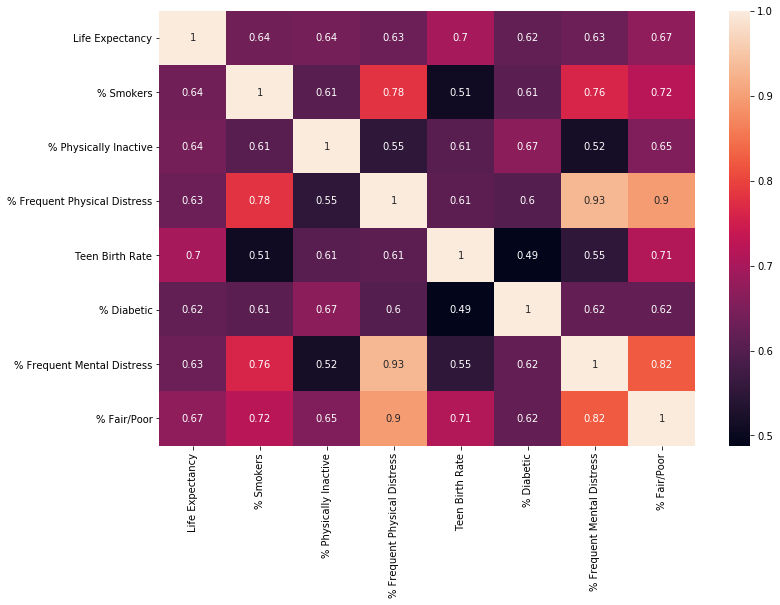

In [95]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(df_seven.corr().abs(), annot=True)

There is a high chance of multicollinearity between two independent variables % Smokers, %Frequent Mental Distress and % Frequent Physical Distress and % Children in Poverty and Household Income as we see from the heatmap above they are highly related to each other.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23a1ccc0>,
      dtype=object)

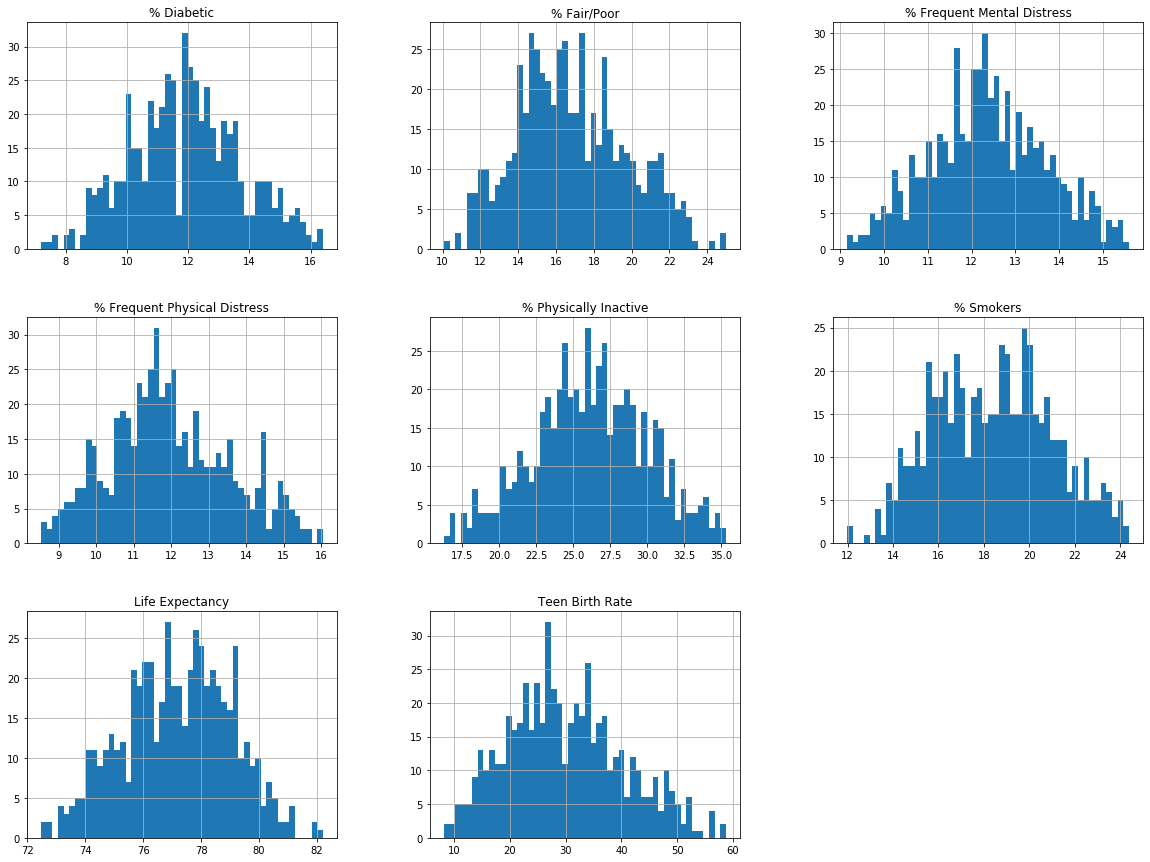

In [92]:
df_seven.hist(bins=50, figsize=(20,15))

Life Expectancy is not normal 0.004441679111588507
% Smokers is not normal 4.4538077432456146e-07
% Physically Inactive is normal
% Frequent Physical Distress is not normal 0.00034191264419886465
Teen Birth Rate is not normal 0.00032742787423102203
% Diabetic is normal
% Frequent Mental Distress is not normal 0.02528402486494703
% Fair/Poor is not normal 0.00010368810873514845


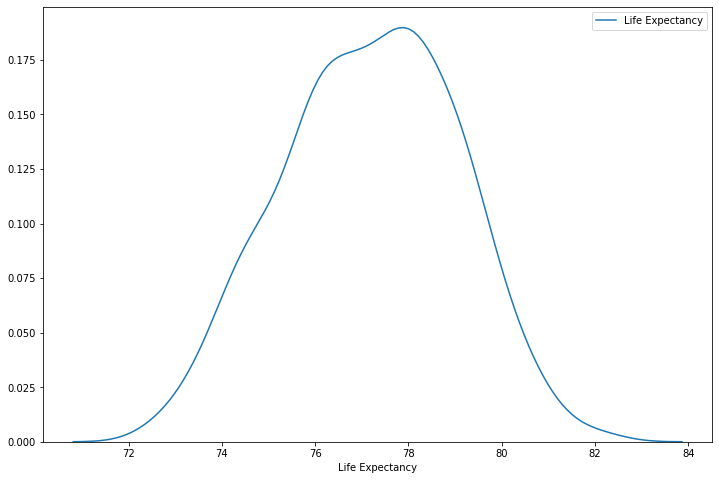

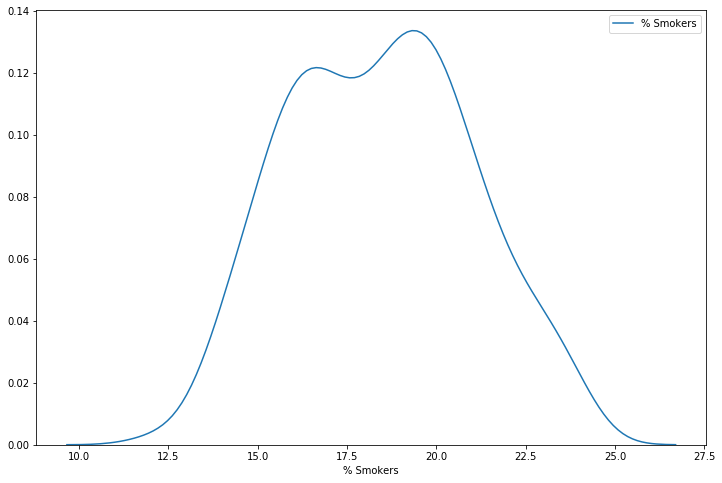

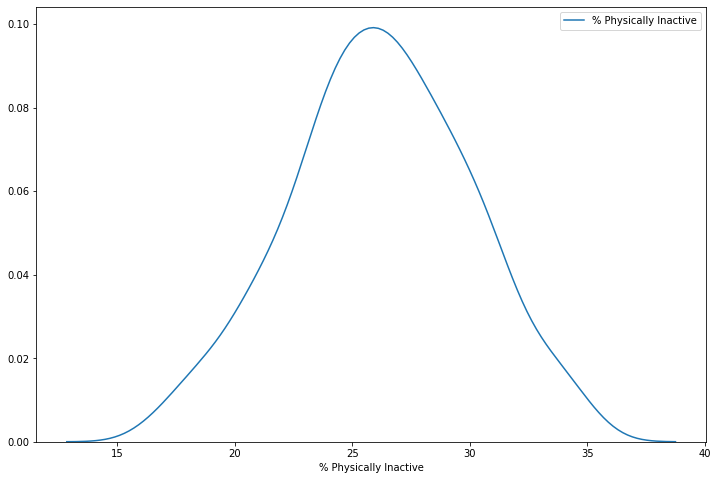

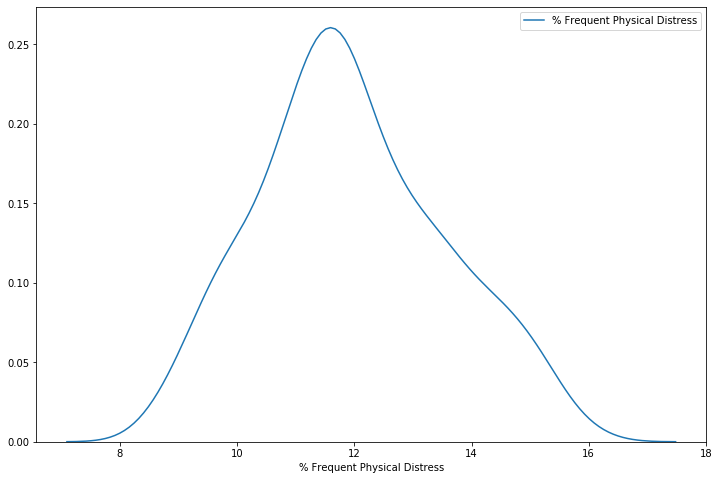

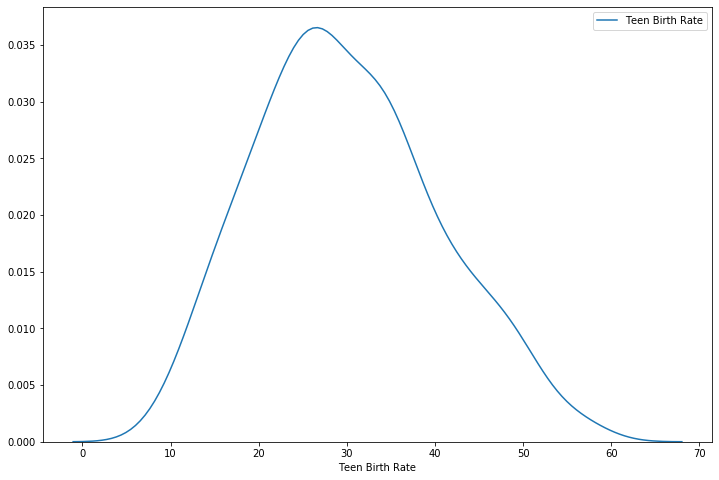

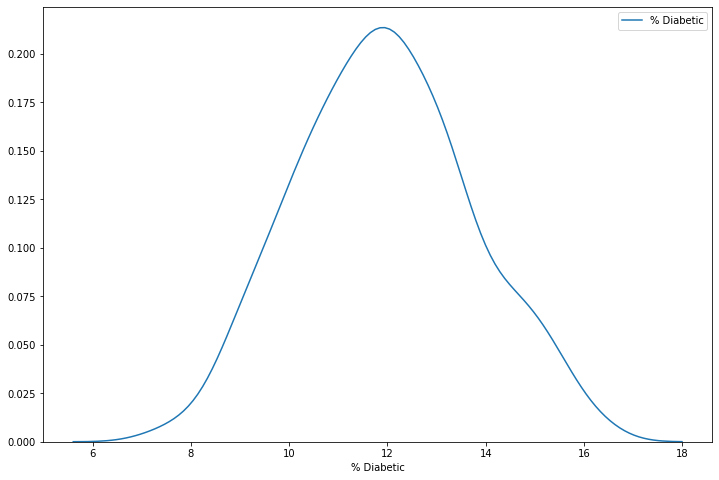

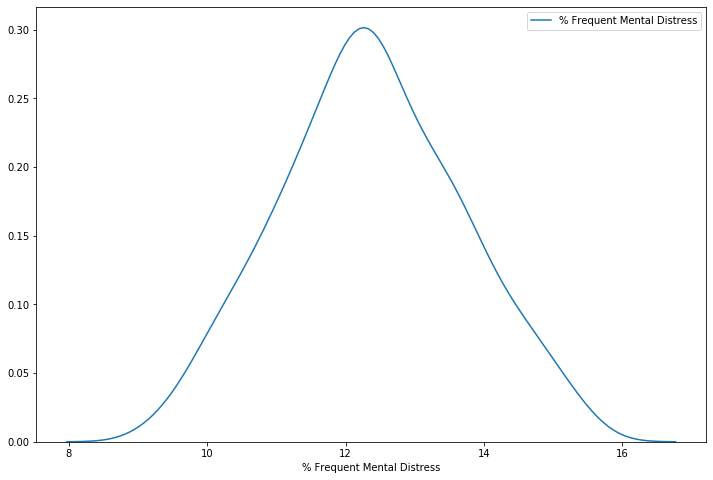

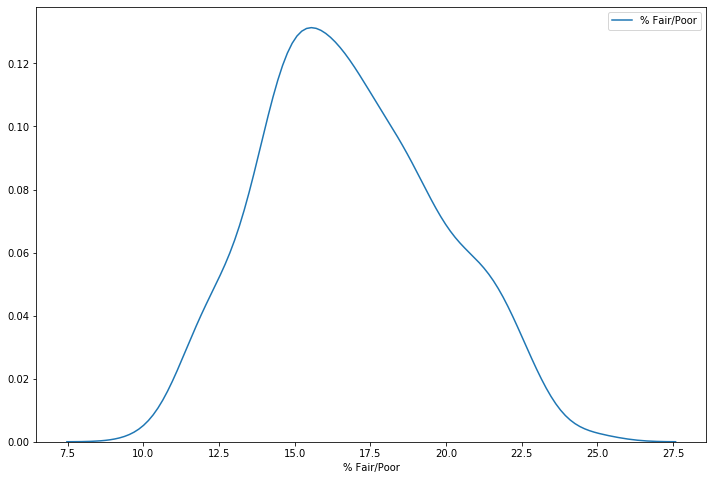

In [93]:
#Normality test
alpha = 0.05
for i in df_seven.columns:
    fig = plt.figure(figsize=(12,8))
    sns.distplot(df_seven[i], label=i, hist=False)
    k2, p = stats.normaltest(df_seven[i])
    if p < alpha:  # null hypothesis: x comes from a normal distribution
         print("%s is not normal"%i,p)
    else:
         print("%s is normal"%i)

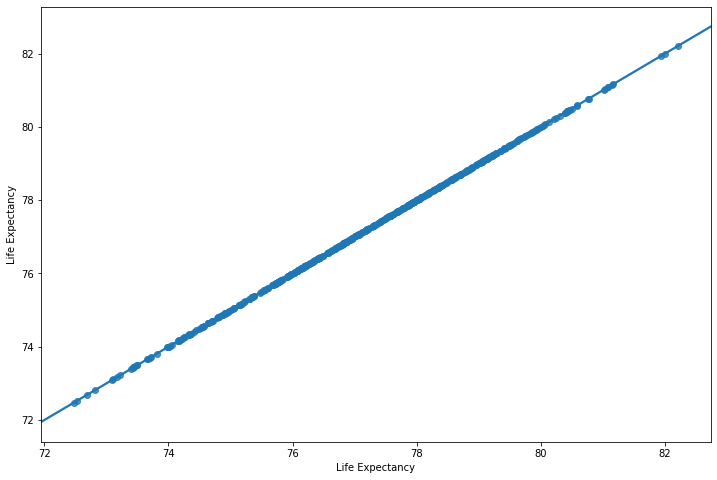

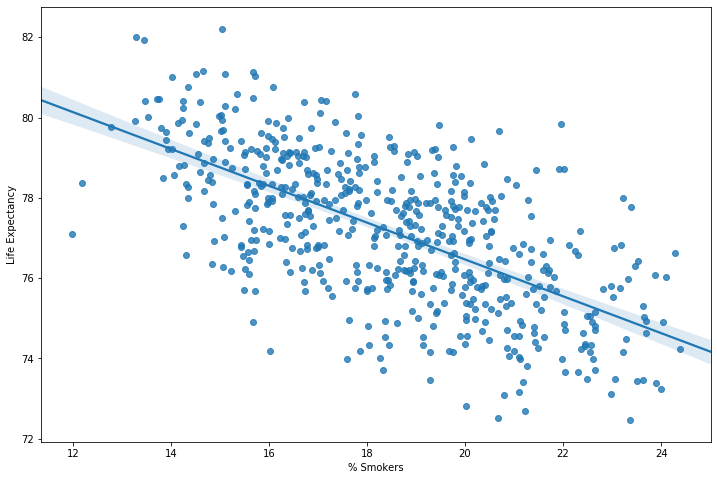

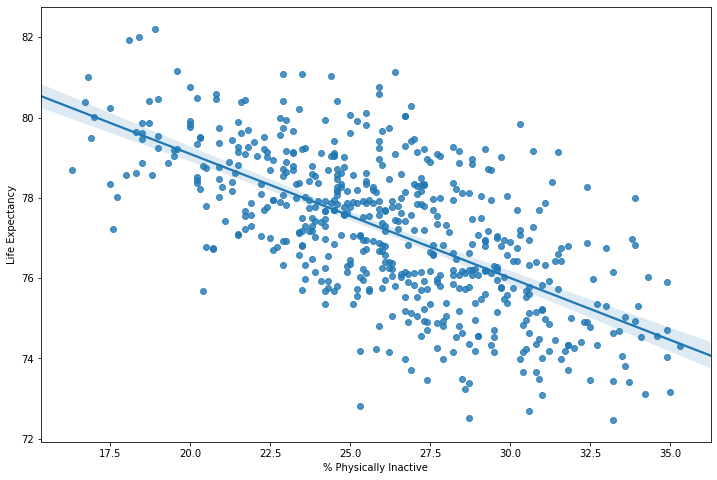

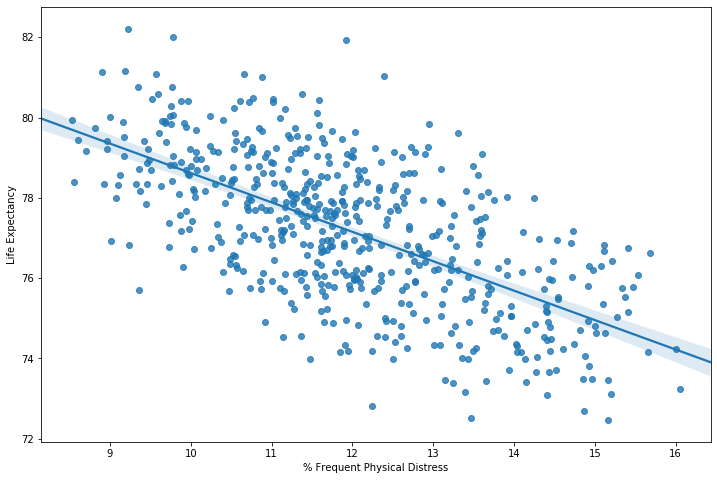

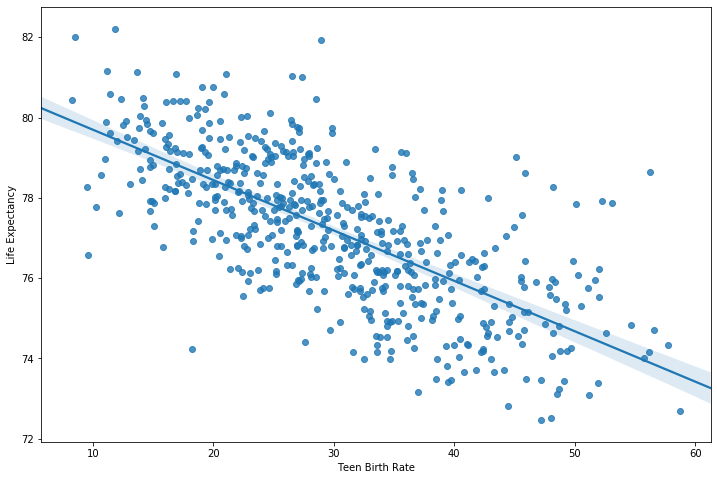

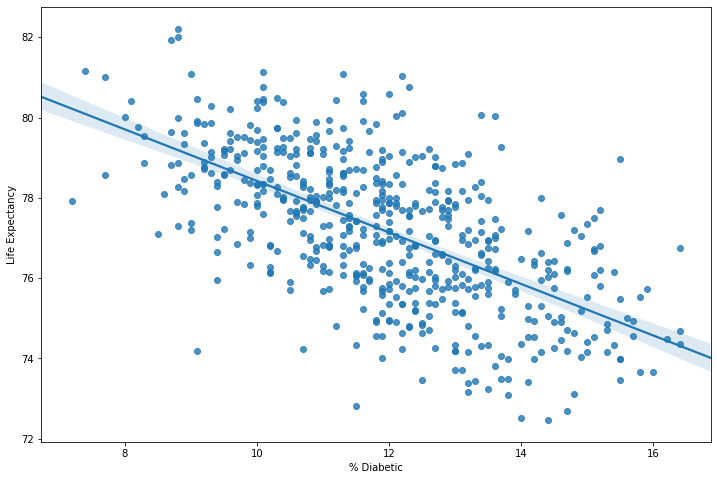

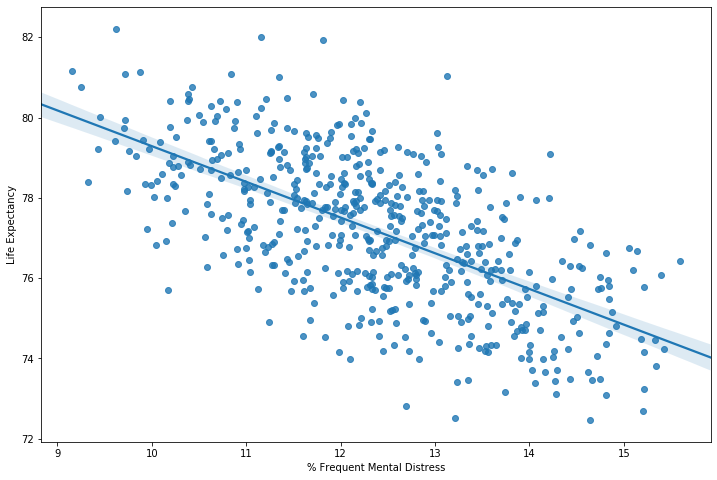

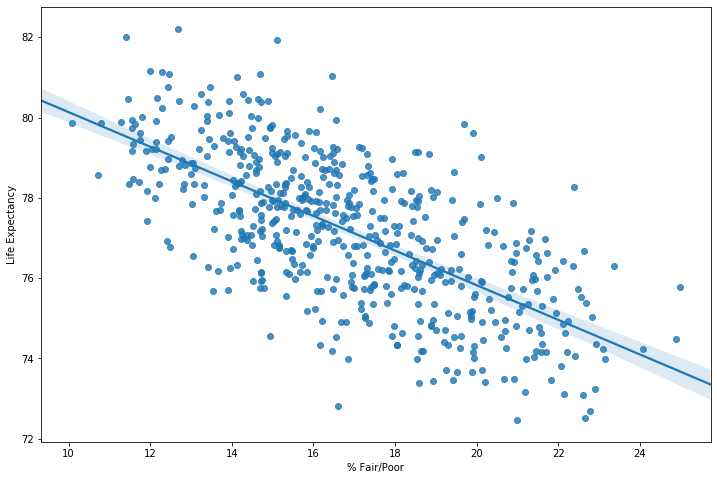

In [94]:
for i in df_seven.columns:
    fig = plt.figure(figsize=(12,8))
    sns.regplot( x=df_seven[i], y=df_seven['Life Expectancy'])

Data doesn't look normal but for Linear Regression we don't need to normalize it since we will use Standard Scale.

In [96]:
target = train_set['Life Expectancy']
predictors1 = train_set[['% Smokers', 'Teen Birth Rate', '% Fair/Poor','% Physically Inactive' ]]

Transformation

In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled1 = scaler.fit_transform(predictors1)

In [98]:
df_scaled = pd.DataFrame(scaled1)
df_scaled.columns = predictors1.columns

We will run different regression models to see which one performs best for our task and choose a baseline model among them

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [104]:
lin_reg = LinearRegression()
c_val = KFold(n_splits=5, shuffle=True, random_state=42)
# lin_reg.fit(scaled1, target)
scores = cross_val_score(lin_reg, scaled1, target, scoring='neg_mean_squared_error', cv=c_val)
lin_score_r2 = np.mean(cross_val_score(lin_reg, scaled1, target, scoring='r2', cv=c_val))
lin_scores_rmse = np.sqrt(-scores)

In [105]:
def display_scores(scores, r2):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard Deviation: ',scores.std())
    print('r2: ', r2)

In [106]:
display_scores(lin_scores_rmse,lin_score_r2)

Scores:  [1.13820144 1.19547359 1.22988696 1.17298228 1.04990041]
Mean:  1.1572889367940529
Standard Deviation:  0.0614352498485673
r2:  0.606205081600707


This is our baseline model. We will try to improve the model by adding more attributes. We will use only the attributes which has more than 0.4 correlation with Life Expectancy to keep our model as simple as possible. Before that we will check training data to make sure if there is any multicollinearity between independent variable.

In [108]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.2) #Lasso is also known as the L1 norm. 
# lasso.fit(scaled1, target)
scores_lasso = cross_val_score(lasso, scaled1, target, scoring='neg_mean_squared_error', cv=c_val)
lasso_r2 = np.mean(cross_val_score(lasso, scaled1, target, scoring='r2', cv=c_val))
lasso_rmse = np.sqrt(-scores_lasso)
display_scores(lasso_rmse, lasso_r2)

Scores:  [1.17413374 1.20575212 1.28761679 1.17033546 1.0802186 ]
Mean:  1.1836113399210013
Standard Deviation:  0.06672852487906927
r2:  0.5892196540268777


In [109]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()


In [110]:
tree_reg.fit(scaled1, target)
scores_tree = cross_val_score(tree_reg, scaled1, target, scoring='neg_mean_squared_error', cv=10)
tree_score_r2 = np.mean(cross_val_score(tree_reg, scaled1, target, scoring='r2', cv=c_val))
tree_rmse_scores = np.sqrt(-scores_tree)
display_scores(tree_rmse_scores, tree_score_r2)

Scores:  [1.62639422 1.76182669 1.71822438 1.54552475 1.54584901 1.74571561
 1.45613307 1.56932064 1.78027334 1.38036548]
Mean:  1.6129627187363582
Standard Deviation:  0.12988104336682166
r2:  0.2722201738790416


In [111]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()


In [112]:
forest_reg.fit(scaled1, target)
scores_forest = cross_val_score(forest_reg, scaled1, target, scoring='neg_mean_squared_error', cv=10)
forest_score_r2 = np.mean(cross_val_score(forest_reg, scaled1, target, scoring='r2', cv=c_val))
forest_rmse_scores = np.sqrt(-scores_forest)
display_scores(forest_rmse_scores, forest_score_r2)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Scores:  [1.16975965 1.45128153 1.26736645 1.04942823 1.32450818 1.21564446
 1.1404244  1.09199429 1.2308317  1.23629662]
Mean:  1.2177535511979956
Standard Deviation:  0.11015655068374587
r2:  0.524027917286304


Our baseline model will be the Linear Regression model.  We will try to improve the model by adding more attributes. We will use only the attributes which has more than 0.4 correlation with Life Expectancy to keep our model as simple as possible. Before that we will check training data to make sure if there is any multicollinearity between independent variable.

In [113]:
attributes = pd.DataFrame(train_set.corrwith(train_set['Life Expectancy']).abs() > 0.4)
attributes.reset_index(inplace=True)
attributes.columns = ['Attribute','Correlation']
list_attr = attributes.loc[attributes['Correlation'] == True, 'Attribute']
list_attr

0                  Life Expectancy
1     % Frequent Physical Distress
2       % Frequent Mental Distress
3                       % Diabetic
4                  % Food Insecure
5             % Insufficient Sleep
6                 Household Income
9                      % Fair/Poor
10                           % LBW
11                       % Smokers
13          Food Environment Index
14           % Physically Inactive
16            % Excessive Drinking
19                 Teen Birth Rate
23                      % Screened
26                  % Some College
28           % Children in Poverty
32               Injury Death Rate
Name: Attribute, dtype: object

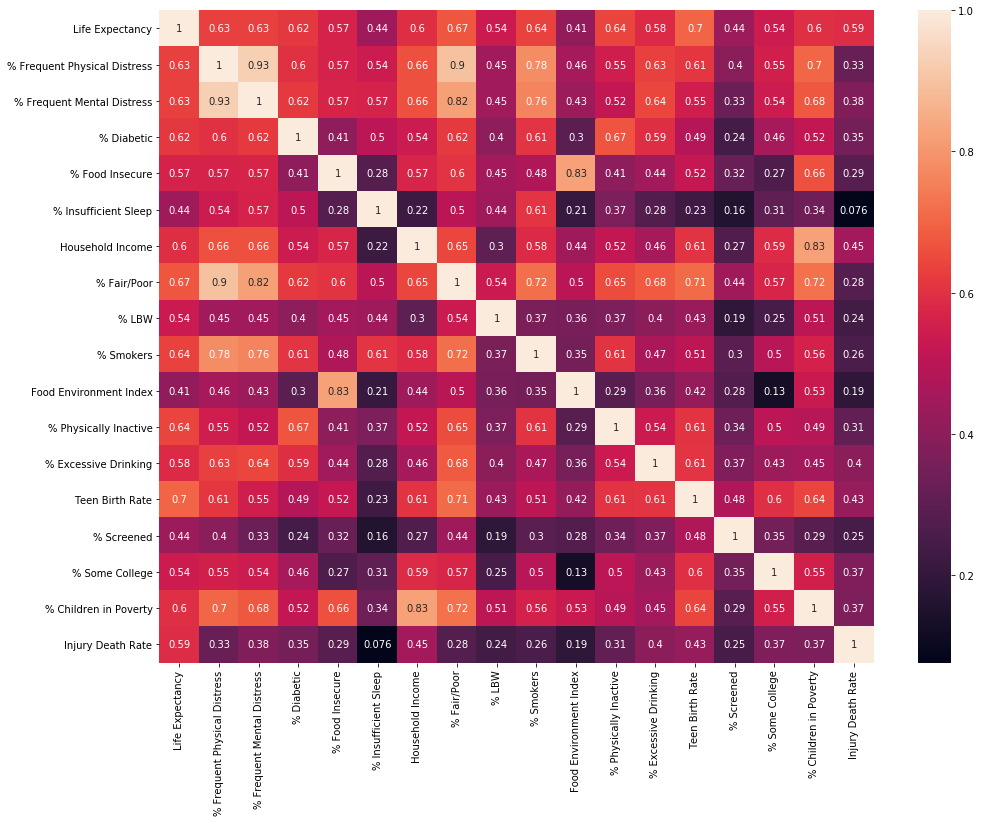

In [114]:
df_att = train_set[list(list_attr)]
fig = plt.figure(figsize=(16,12))
sns.heatmap(df_att.corr().abs(), annot=True)

In [115]:
corr = df_att.corr() < 0.75
corr.reset_index(drop=False,inplace=True)
corr.rename(columns={'index': 'Attribute'},inplace=True)
corr.head()

,Attribute,Life Expectancy,% Frequent Physical Distress,% Frequent Mental Distress,% Diabetic,% Food Insecure,% Insufficient Sleep,Household Income,% Fair/Poor,% LBW,% Smokers,Food Environment Index,% Physically Inactive,% Excessive Drinking,Teen Birth Rate,% Screened,% Some College,% Children in Poverty,Injury Death Rate
0,Life Expectancy,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,% Frequent Physical Distress,True,False,False,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True
2,% Frequent Mental Distress,True,False,False,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True
3,% Diabetic,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,% Food Insecure,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True


In [116]:
for i in corr.columns:
    for j in list(range(1,len(corr))):
        if corr[i][j] == False:
            if i != corr.Attribute[j]:
                print(f'High chance of multicollinearity between: {i} and {corr.Attribute[j]}\n')
            else:
                pass
        else:
            pass

High chance of multicollinearity between: % Frequent Physical Distress and % Frequent Mental Distress

High chance of multicollinearity between: % Frequent Physical Distress and % Fair/Poor

High chance of multicollinearity between: % Frequent Physical Distress and % Smokers

High chance of multicollinearity between: % Frequent Mental Distress and % Frequent Physical Distress

High chance of multicollinearity between: % Frequent Mental Distress and % Fair/Poor

High chance of multicollinearity between: % Frequent Mental Distress and % Smokers

High chance of multicollinearity between: % Fair/Poor and % Frequent Physical Distress

High chance of multicollinearity between: % Fair/Poor and % Frequent Mental Distress

High chance of multicollinearity between: % Smokers and % Frequent Physical Distress

High chance of multicollinearity between: % Smokers and % Frequent Mental Distress



The variables we should exclude from our model are:
% Frequent Physical Distress 
% Frequent Mental Distress

In [117]:
multicollinear = ['% Frequent Physical Distress', '% Frequent Mental Distress']

In [118]:
predict_variables = train_set.drop(multicollinear, axis=1)
predict_variables.drop('Life Expectancy', axis=1, inplace=True)

In [119]:
predict_variables.columns

Index(['% Diabetic', '% Food Insecure', '% Insufficient Sleep',
       'Household Income', '% Homeowners', '% Severe Housing Cost Burden',
       '% Fair/Poor', '% LBW', '% Smokers', '% Obese',
       'Food Environment Index', '% Physically Inactive', '% With Access',
       '% Excessive Drinking', '% Alcohol-Impaired', 'Chlamydia Rate',
       'Teen Birth Rate', '% Uninsured', 'Dentist Rate',
       'Preventable Hosp. Rate', '% Screened', '% Vaccinated',
       'Graduation Rate', '% Some College', '% Unemployed',
       '% Children in Poverty', 'Income Ratio', '% Single-Parent Households',
       'Association Rate', 'Injury Death Rate', 'Average Daily PM2.5',
       '% Severe Housing Problems', '% Drive Alone',
       '% Long Commute - Drives Alone'],
      dtype='object')

In [120]:
#Scaling the training set
scaler = StandardScaler()
scaled = scaler.fit_transform(predict_variables)

In [121]:
scaled_df = pd.DataFrame(scaled)
scaled_df.columns = predict_variables.columns

In [122]:
lin_reg = LinearRegression()
c_val = KFold(n_splits=5, shuffle=True, random_state=42)
# lin_reg.fit(scaled, target)
scores0 = cross_val_score(lin_reg, scaled, target, scoring='neg_mean_squared_error', cv=c_val)
lin_score0_r2 = np.mean(cross_val_score(lin_reg, scaled, target, scoring='r2', cv=c_val))
lin_scores0_rmse = np.sqrt(-scores0)

In [123]:
display_scores(lin_scores0_rmse,lin_score0_r2)

Scores:  [0.85863521 0.90632243 0.97701749 0.9173436  0.9569919 ]
Mean:  0.9232621234838213
Standard Deviation:  0.041293965204714594
r2:  0.7495276165332824


In [124]:
import statsmodels.api as sm
preds = sm.add_constant(scaled)
ols_model = sm.OLS(target,preds)
ols_result = ols_model.fit()

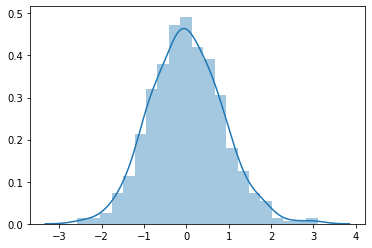

In [125]:
sns.distplot(ols_result.resid)

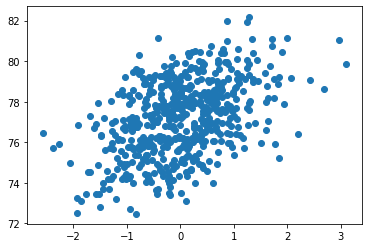

In [126]:
plt.scatter(ols_result.resid,target)

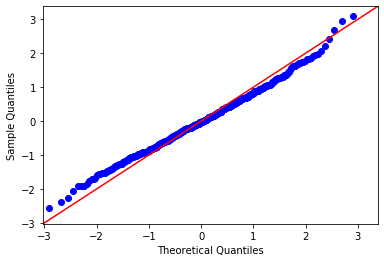

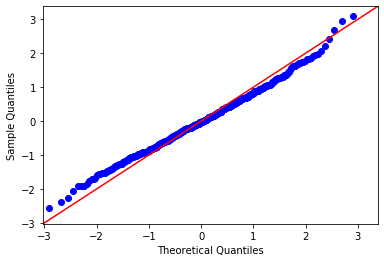

In [127]:
sm.qqplot(ols_result.resid, line='45')

In [128]:
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life Expectancy   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     57.81
Date:                Tue, 14 Jan 2020   Prob (F-statistic):          9.12e-154
Time:                        12:56:29   Log-Likelihood:                -699.40
No. Observations:                 557   AIC:                             1469.
Df Residuals:                     522   BIC:                             1620.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         77.1846      0.037   2076.247      0.000      77.112      77.258
x1            -0.0705      0.065     -1.078      0.282      -0.199       0.058
x2            -0.2394      0.084     -2.857      0.004      -0.404      -0.075
x3            -0.1351      0.062     -2.170      0.030      -0.257      -0.013
x4             0.3006      0.093      3.239      0.001       0.118       0.483
x5             0.2002      0.062      3.215      0.001       0.078       0.323
x6            -0.0692      0.079     -0.876      0.381      -0.224       0.086
x7             0.1527      0.093      1.646      0.100      -0.030       0.335
x8            -0.2282      0.058     -3.926      0.000      -0.342      -0.114
x9            -0.2158      0.071     -3.037      0.003      -0.355      -0.076
x10           -0.0956      0.048     -1.976      0.049      -0.191      -0.001
x11           -0.0870      0.071     -1.218      0.224      -0.227       0.053
x12           -0.1072      0.065     -1.639      0.102      -0.236       0.021
x13            0.0606      0.052      1.172      0.242      -0.041       0.162
x14            0.0293      0.064      0.460      0.646      -0.096       0.155
x15           -0.0297      0.040     -0.750      0.453      -0.107       0.048
x16           -0.0638      0.061     -1.039      0.299      -0.185       0.057
x17           -0.3851      0.073     -5.272      0.000      -0.529      -0.242
x18            0.0667      0.062      1.082      0.280      -0.054       0.188
x19            0.0415      0.057      0.728      0.467      -0.071       0.154
x20           -0.0764      0.045     -1.690      0.092      -0.165       0.012
x21            0.1391      0.049      2.861      0.004       0.044       0.235
x22            0.0314      0.047      0.666      0.506      -0.061       0.124
x23           -0.0215      0.049     -0.441      0.660      -0.117       0.074
x24            0.0710      0.063      1.128      0.260      -0.053       0.195
x25            0.0165      0.055      0.302      0.763      -0.091       0.124
x26            0.1375      0.100      1.380      0.168      -0.058       0.333
x27           -0.0068      0.054     -0.126      0.899      -0.113       0.099
x28            0.0779      0.054      1.431      0.153      -0.029       0.185
x29            0.0280      0.051      0.551      0.582      -0.072       0.128
x30           -0.5818      0.048    -12.117      0.000      -0.676      -0.488
x31           -0.2043      0.052     -3.943      0.000      -0.306      -0.102
x32           -0.0015      0.075     -0.020      0.984      -0.150       0.147
x33           -0.1254      0.050     -2.495      0.013      -0.224      -0.027
x34           -0.0832      0.057     -1.472      0.142      -0.194       0.028
==============================================================================
Om

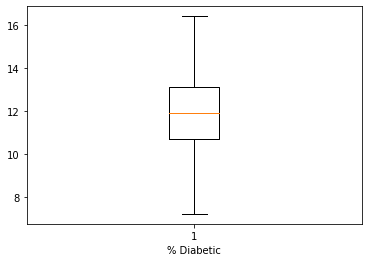

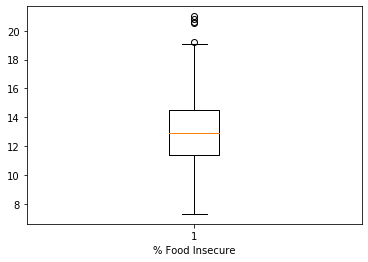

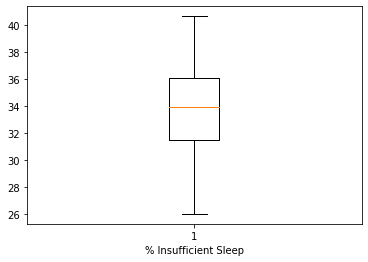

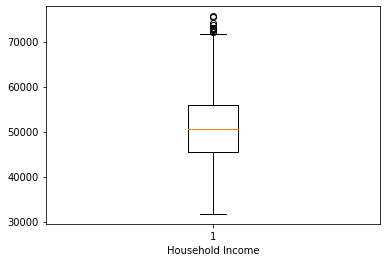

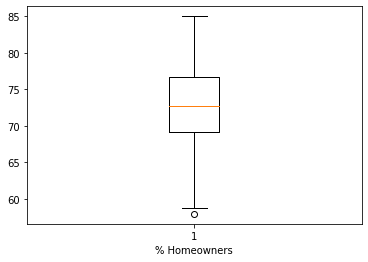

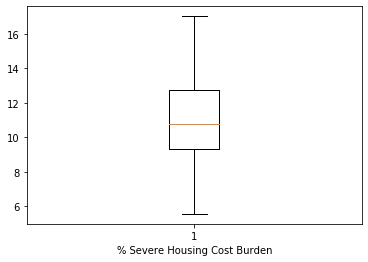

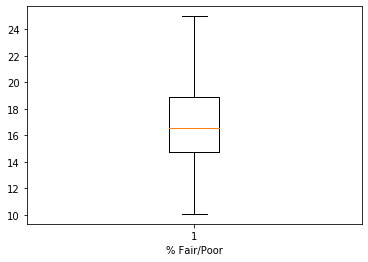

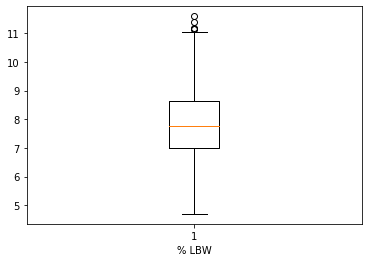

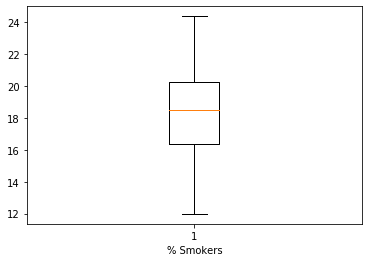

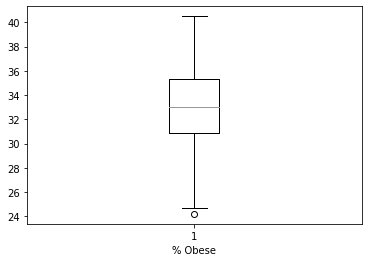

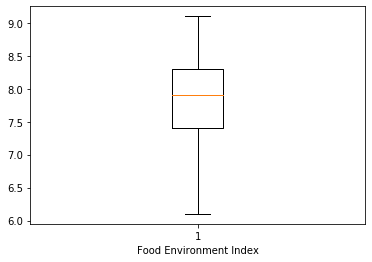

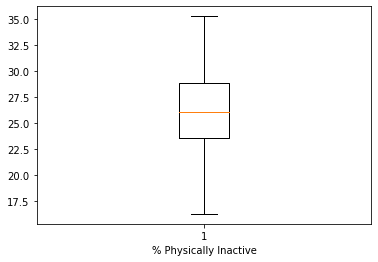

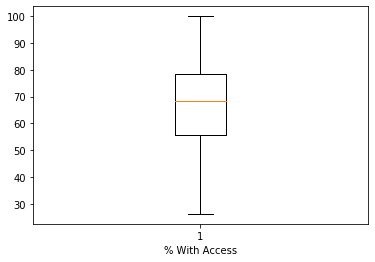

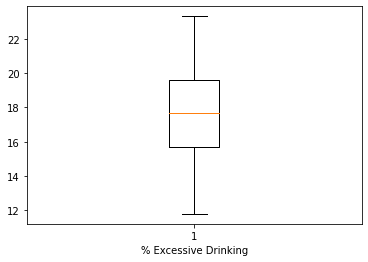

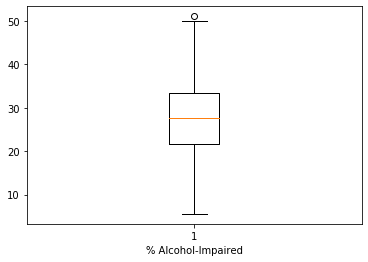

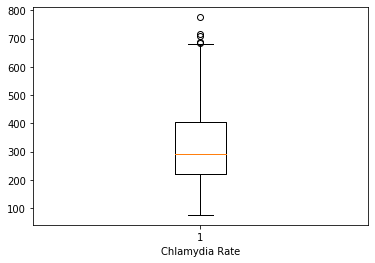

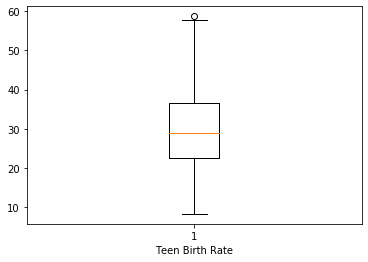

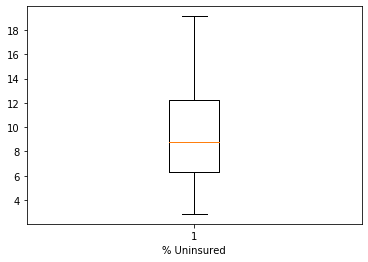

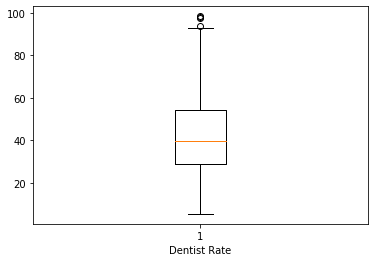

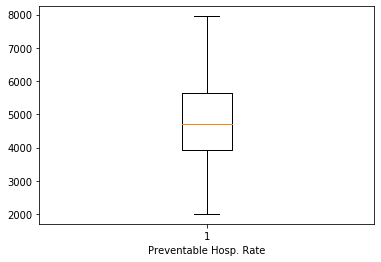

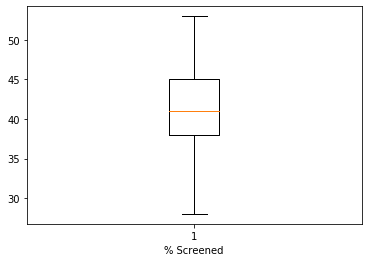

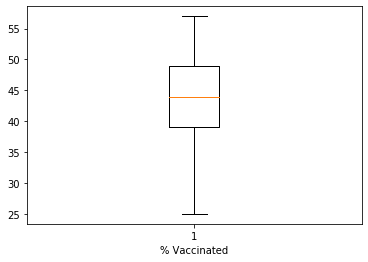

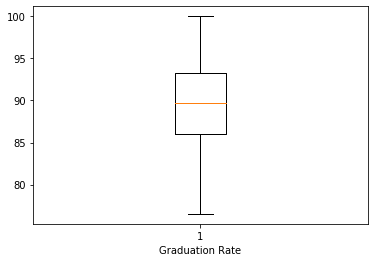

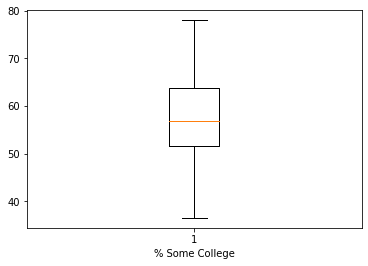

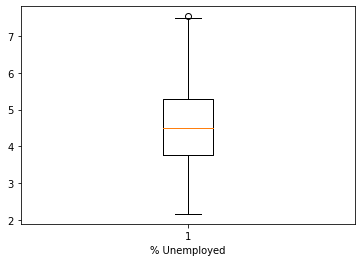

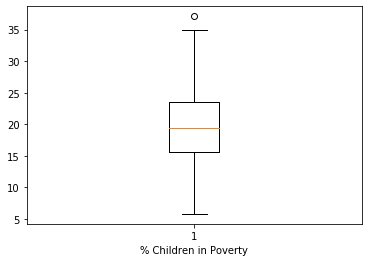

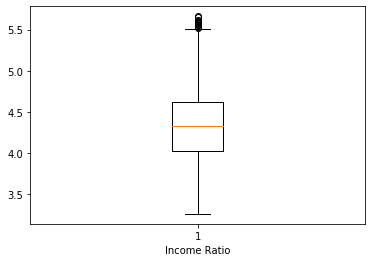

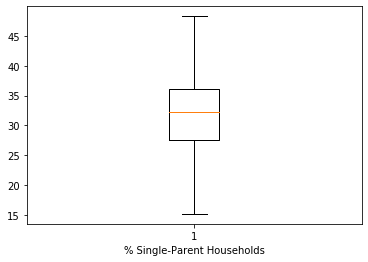

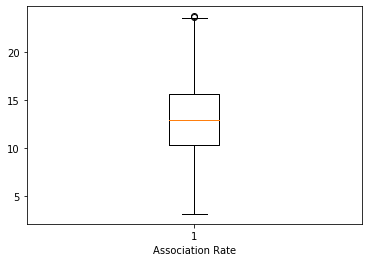

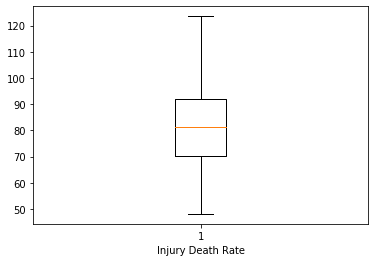

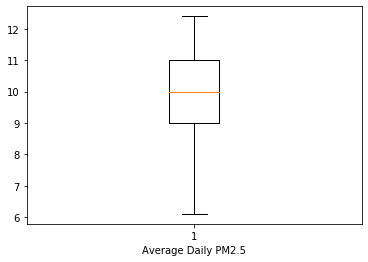

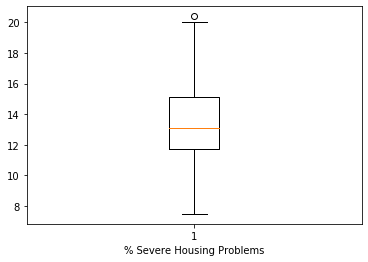

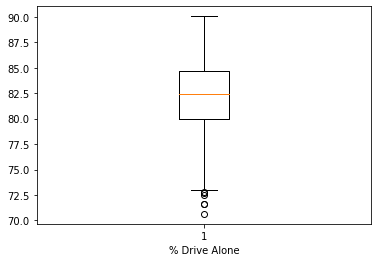

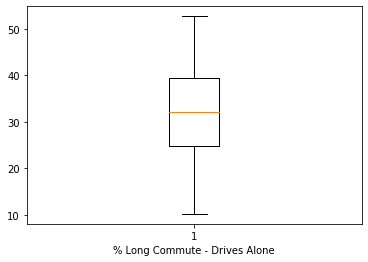

In [129]:
for i in predict_variables.columns:
    plt.boxplot(predict_variables[i])
    plt.xlabel(i)
    plt.show()

We will remove the variables with lots of outliers to make our model more efficient.
The varibles to be removed:
'% Drive Alone', 'Average Daily PM2.5', 'Income Ratio', 'Chlamydia Rate', '% LBW', 'Household Income', '% Food Insecure'

In [130]:
df_2 = predict_variables.drop(['% Drive Alone', 'Average Daily PM2.5', 'Income Ratio', 
                               'Chlamydia Rate', '% LBW', 'Household Income', '% Food Insecure', 'Dentist Rate'],
                              axis=1)

In [131]:
len(df_2.columns)

26

In [132]:
scaled_df2 = scaler.fit_transform(df_2)

In [133]:
import statsmodels.api as sm
preds_df2 = sm.add_constant(scaled_df2)
ols_model_df2 = sm.OLS(target,preds_df2)
ols_result_df2 = ols_model_df2.fit()

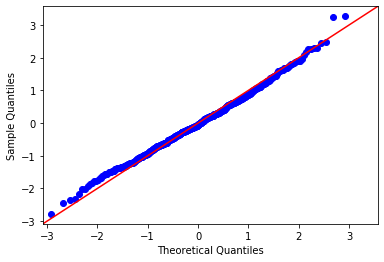

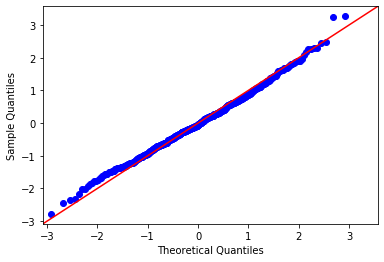

In [134]:
sm.qqplot(ols_result_df2.resid, line='45')

In [135]:
ols_result_df2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life Expectancy   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     63.27
Date:                Tue, 14 Jan 2020   Prob (F-statistic):          3.86e-144
Time:                        12:57:04   Log-Likelihood:                -741.02
No. Observations:                 557   AIC:                             1536.
Df Residuals:                     530   BIC:                             1653.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         77.1846      0.040   1941.452      0.000      77.107      77.263
x1            -0.1364      0.069     -1.980      0.048      -0.272      -0.001
x2            -0.2076      0.063     -3.295      0.001      -0.331      -0.084
x3             0.2467      0.063      3.936      0.000       0.124       0.370
x4            -0.1100      0.080     -1.373      0.170      -0.267       0.047
x5             0.0765      0.096      0.793      0.428      -0.113       0.266
x6            -0.2558      0.071     -3.624      0.000      -0.394      -0.117
x7            -0.0938      0.051     -1.851      0.065      -0.193       0.006
x8             0.0783      0.059      1.338      0.182      -0.037       0.193
x9            -0.1716      0.068     -2.505      0.013      -0.306      -0.037
x10            0.0696      0.053      1.304      0.193      -0.035       0.174
x11            0.0129      0.066      0.194      0.846      -0.117       0.143
x12           -0.0397      0.042     -0.949      0.343      -0.122       0.042
x13           -0.5200      0.075     -6.975      0.000      -0.666      -0.374
x14            0.0192      0.064      0.302      0.763      -0.106       0.144
x15           -0.1153      0.047     -2.451      0.015      -0.208      -0.023
x16            0.1369      0.051      2.675      0.008       0.036       0.237
x17           -0.0198      0.048     -0.411      0.682      -0.115       0.075
x18           -0.0333      0.050     -0.660      0.510      -0.132       0.066
x19            0.0259      0.064      0.405      0.685      -0.099       0.151
x20            0.0166      0.056      0.296      0.768      -0.094       0.127
x21           -0.0778      0.086     -0.907      0.365      -0.246       0.091
x22            0.0033      0.055      0.060      0.953      -0.105       0.111
x23           -0.0232      0.052     -0.450      0.653      -0.125       0.078
x24           -0.5995      0.049    -12.154      0.000      -0.696      -0.503
x25            0.1133      0.077      1.468      0.143      -0.038       0.265
x26           -0.1373      0.053     -2.580      0.010      -0.242      -0.033
==============================================================================
Omnibus:                        6.102   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                6.028
Skew:                           0.215   Prob(JB):                       0.0491
Kurtosis:                       3.274   Cond. No.                         7.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Removing the variables which has high number of outliers didn't increase our model.

In [136]:
lasso_1 = Lasso(alpha=.1) #Lasso is also known as the L1 norm. 
# lasso_1.fit(scaled, target)
scores_lasso_1 = cross_val_score(lasso_1, scaled, target, scoring='neg_mean_squared_error', cv=c_val)
lasso_1_r2 = np.mean(cross_val_score(lasso_1, scaled, target, scoring='r2', cv=c_val))
lasso_1_rmse = np.sqrt(-scores_lasso_1)
display_scores(lasso_1_rmse, lasso_1_r2)

Scores:  [0.88713194 0.89059076 0.98175124 0.92827203 0.95866054]
Mean:  0.9292813021526566
Standard Deviation:  0.037123520484046026
r2:  0.7466716693060246
